<a href="https://colab.research.google.com/github/Kartikratos/Exploratory-Data-Analysis-Valorant-1000-Games-/blob/main/Implementing_Regression_%26_Classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')


In [57]:
df_start = pd.read_csv('/content/valorant_games_project.csv')

In [58]:
df_one = df_start[['acs', 'avg_dmg']]

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
x = df_one[['avg_dmg']]
y = df_one[['acs']]

# Linear Regression

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)

In [62]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()
slr.fit(x_train, y_train)

LinearRegression()

In [63]:
#Prediction of test set
y_pred_slr= slr.predict(x_test)
#Predicted values


In [64]:
slr_diff = pd.DataFrame({'Actual value': y_test.values.flatten(), 'Predicted value': y_pred_slr.flatten()})
slr_diff.head()


,Actual value,Predicted value
0,273,277.485959
1,235,229.369202
2,168,164.178756
3,174,173.491677
4,82,102.092617


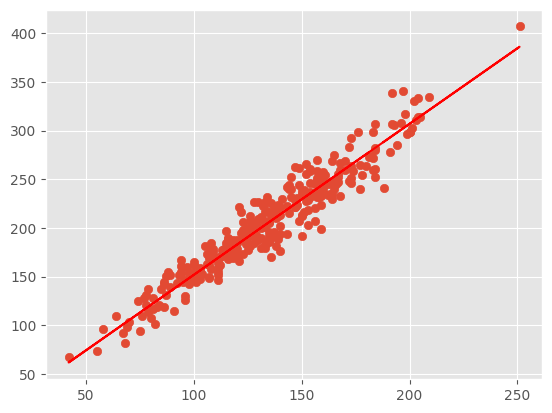

In [65]:
plt.scatter(x_test,y_test)
plt.plot(x_test, y_pred_slr, 'Red')
plt.show()

In [66]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_slr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_slr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_slr))
print('R squared: {:.2f}'.format(slr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 92.94
Mean Absolute Error: 11.940813459362134
Mean Square Error: 232.48940856419702
Root Mean Square Error: 15.247603371159581


In [67]:
df.columns

Index(['game_id', 'episode', 'act', 'rank', 'date', 'agent', 'map', 'outcome',
       'round_wins', 'round_losses', 'kills', 'deaths', 'assists', 'kdr',
       'avg_dmg_delta', 'headshot_pct', 'avg_dmg', 'acs', 'num_frag',
       'rank_encoded', 'outcome_encoded'],
      dtype='object')

Agents are Chamber, Sage, Cypher , Reyna , Omen and killjoy

Ranks are-  unranked<silver< gold < platinum<diamond<ascendant

maps are Split, Bind, Icebox, Ascent, Pearl, Fracture, Breeze , Sunset, Lotus, Abyss, Haven

Outcome is - Win, Loss, Draw



In [68]:

from sklearn.preprocessing import LabelEncoder

df_start = df_start.copy()

df = pd.DataFrame(df_start)

# One-Hot Encode 'agent' and 'map'
agent_dummies = pd.get_dummies(df['agent'], prefix='Agent', drop_first=True)
map_dummies = pd.get_dummies(df['map'], prefix='Map', drop_first=True)

# Label Encode 'rank'
rank_encoder = LabelEncoder()
df['rank_encoded'] = rank_encoder.fit_transform(df['rank'])

# If Outcome is the target variable
df['outcome_encoded'] = df['outcome'].map({'Win': 1, 'Loss': 0, 'Draw': 0})

# If Outcome is an independent variable
# outcome_dummies = pd.get_dummies(df['outcome'], prefix='Outcome', drop_first=True)

# Combine encoded features
df_encoded = pd.concat([df, agent_dummies, map_dummies], axis=1)

# Drop original categorical columns
df_encoded = df_encoded.drop(['agent', 'rank', 'map', 'outcome'], axis=1)

print(df_encoded)


     game_id  episode  act        date  round_wins  round_losses  kills  \
0          1        6    2   4/11/2023           5            13      8   
1          2        6    2   4/12/2023           4            13      3   
2          3        6    2   4/15/2023          13             4      7   
3          4        6    2   4/15/2023           9            13     18   
4          5        6    2   4/15/2023           1            13      6   
..       ...      ...  ...         ...         ...           ...    ...   
995      996        9    3  11/11/2024          13             9     17   
996      997        9    3  11/11/2024          11            13     27   
997      998        9    3  11/11/2024           6            13     12   
998      999        9    3  11/12/2024          13            10     18   
999     1000        9    3  11/12/2024           7            13      8   

     deaths  assists  kdr  ...  Map_Ascent  Map_Bind  Map_Breeze  \
0        15        4  0.5  ... 

In [69]:
df_encoded.columns

Index(['game_id', 'episode', 'act', 'date', 'round_wins', 'round_losses',
       'kills', 'deaths', 'assists', 'kdr', 'avg_dmg_delta', 'headshot_pct',
       'avg_dmg', 'acs', 'num_frag', 'rank_encoded', 'outcome_encoded',
       'Agent_Chamber', 'Agent_Cypher', 'Agent_Fade', 'Agent_KAY/O',
       'Agent_Killjoy', 'Agent_Omen', 'Agent_Reyna', 'Agent_Sage',
       'Agent_Viper', 'Map_Ascent', 'Map_Bind', 'Map_Breeze', 'Map_Fracture',
       'Map_Haven', 'Map_Icebox', 'Map_Lotus', 'Map_Pearl', 'Map_Split',
       'Map_Sunset'],
      dtype='object')

In [70]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols_to_normalize = ['round_wins', 'round_losses', 'kills', 'deaths', 'assists', 'kdr',
       'avg_dmg_delta', 'headshot_pct', 'avg_dmg', 'acs', 'num_frag']
df[cols_to_normalize] = scaler.fit_transform(df_encoded[cols_to_normalize])


In [71]:
independent_variables = [
       'kills', 'deaths', 'assists', 'kdr', 'avg_dmg_delta', 'headshot_pct',
       'avg_dmg', 'acs', 'num_frag', 'rank_encoded'

    ]

independent_variables += map_dummies.columns.tolist()
independent_variables += agent_dummies.columns.tolist()

# Independent variables (X)
X = df_encoded[independent_variables]

# Dependent variable (y)
y = df_encoded['outcome_encoded']


In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [73]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [74]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 0.13967461889910823
R-squared Score: 0.4410779555858013


In [75]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)



          Feature  Coefficient
0           kills     0.057919
1          deaths    -0.088562
2         assists     0.029640
3             kdr    -0.102639
4   avg_dmg_delta     0.003379
5    headshot_pct    -0.001818
6         avg_dmg    -0.001321
7             acs    -0.002037
8        num_frag     0.130118
9    rank_encoded    -0.000791
10     Map_Ascent     0.002459
11       Map_Bind    -0.021331
12     Map_Breeze     0.095927
13   Map_Fracture     0.090230
14      Map_Haven     0.090950
15     Map_Icebox    -0.051723
16      Map_Lotus     0.056607
17      Map_Pearl     0.110897
18      Map_Split     0.011053
19     Map_Sunset    -0.039638
20  Agent_Chamber    -0.086704
21   Agent_Cypher    -0.048002
22     Agent_Fade     0.399190
23    Agent_KAY/O    -0.258176
24  Agent_Killjoy    -0.092549
25     Agent_Omen    -0.053133
26    Agent_Reyna    -0.038824
27     Agent_Sage    -0.049446
28    Agent_Viper     0.227643


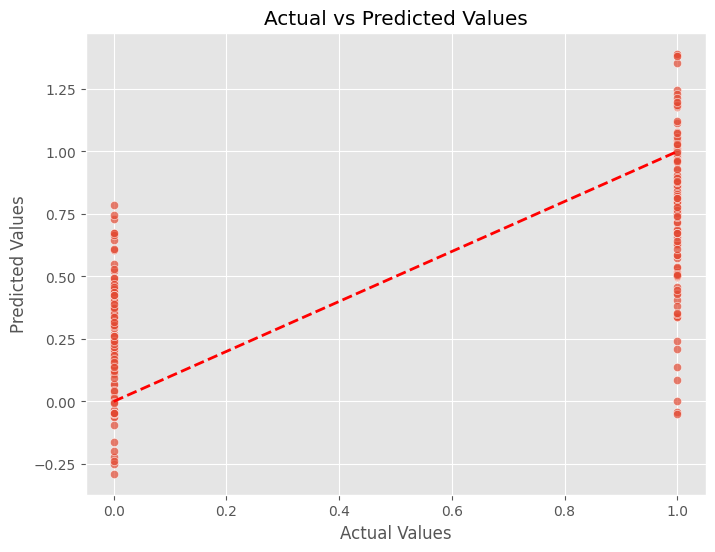

In [76]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()


# XGB Boosting Prediction


Accuracy: 0.7733333333333333
Confusion Matrix:
 [[118  34]
 [ 34 114]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.78      0.78       152
           1       0.77      0.77      0.77       148

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300



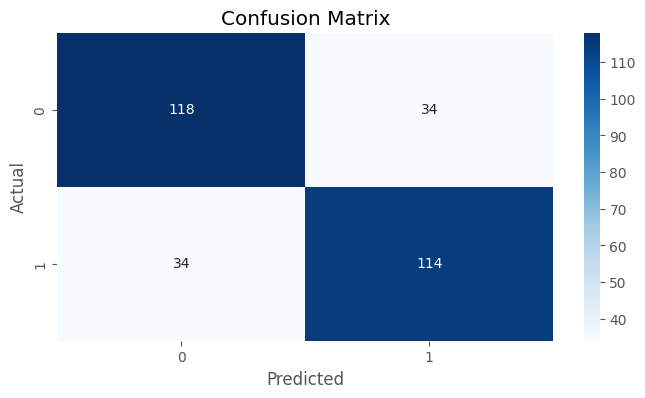

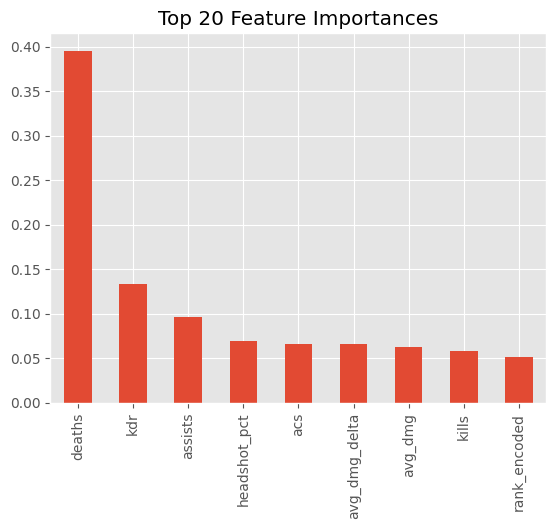

In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# Assuming the dataset 'df' is already loaded
# Replace 'target_column' with the actual column name of your target variable
# Replace 'independent_vars' with the actual list of independent variables

independent_vars = [
   'kills',
    'deaths',
   'assists',
    'kdr',
    'avg_dmg_delta',
   'headshot_pct',
   'avg_dmg',
   'acs',
   'rank_encoded'

] + list(df.filter(like='map_encoded').columns) + list(df.filter(like='agent_encoded').columns)

target_column = 'outcome_encoded'  # Replace with the actual target column name

# Splitting the dataset into training and testing sets
X = df[independent_vars]
y = df[target_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

# Initializing and training the XGBoost classifier
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Making predictions
y_pred = xgb_model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature importance visualization
feature_importances = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)

feature_importances[:20].plot(kind='bar')
plt.title('Top 20 Feature Importances')
plt.show()


# Forest Classifier

Accuracy: 0.81
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       152
           1       0.84      0.76      0.80       148

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300



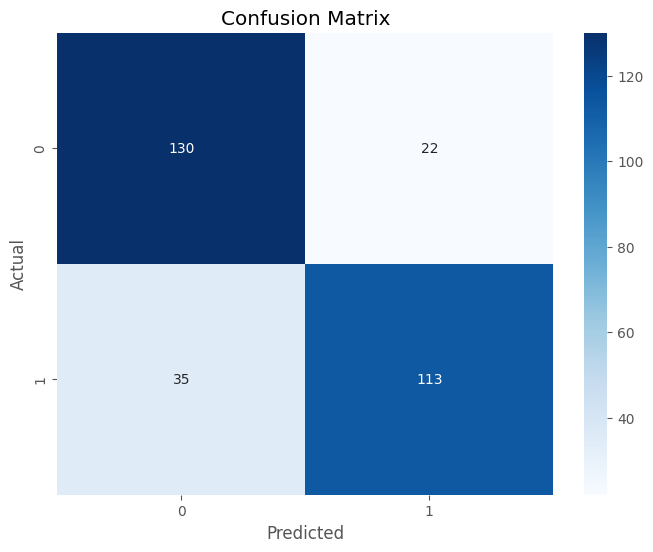

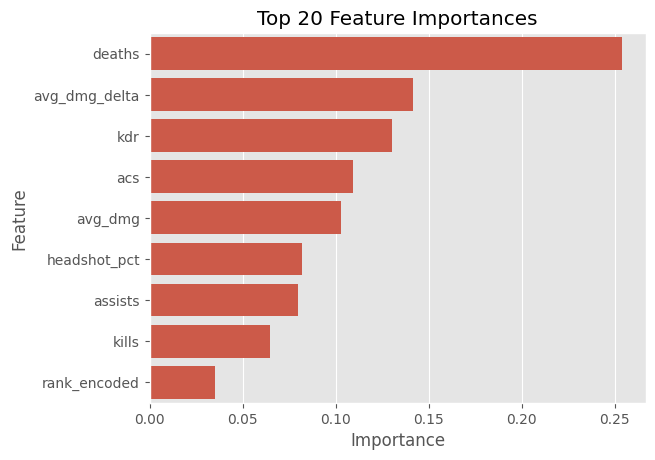

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rf_model = RandomForestClassifier(n_estimators=2000, random_state=42)

rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

# confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Feature Importance
importances = rf_model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the top 20 features by importance

sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
plt.title('Top 20 Feature Importances')
plt.show()

Accuracy: 0.835
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       102
           1       0.84      0.82      0.83        98

    accuracy                           0.83       200
   macro avg       0.84      0.83      0.83       200
weighted avg       0.84      0.83      0.83       200



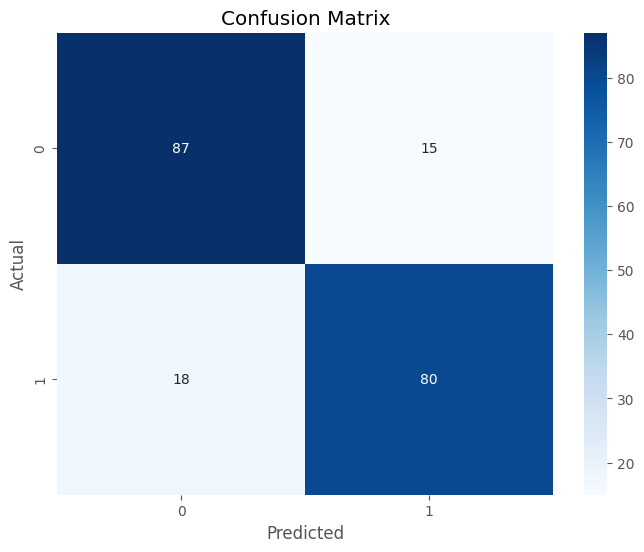

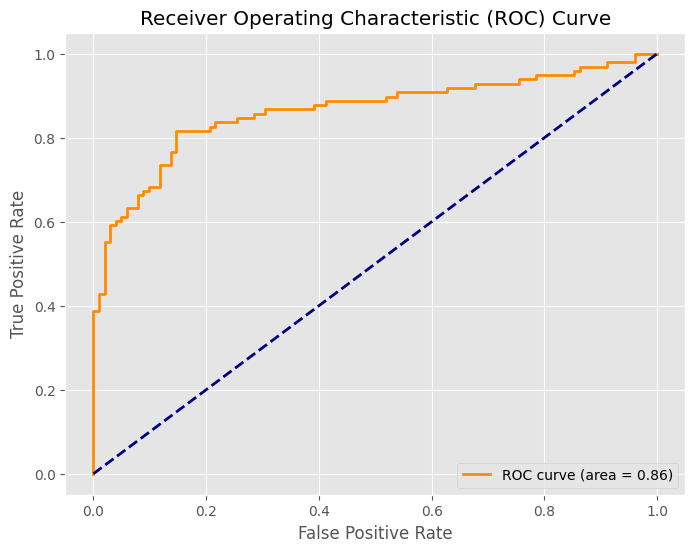

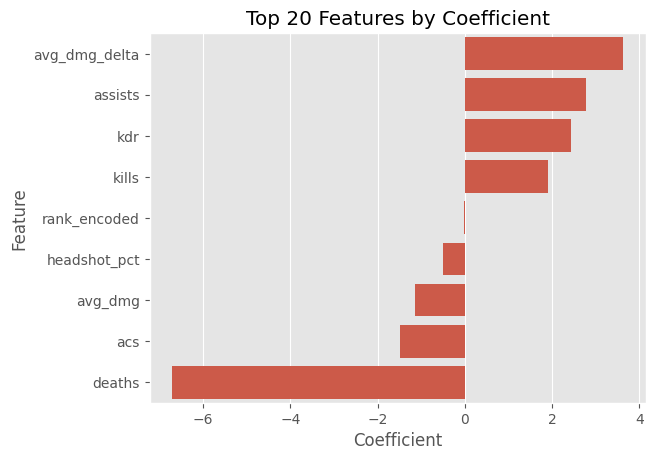

In [79]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns



# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logreg_model = LogisticRegression(max_iter=200, random_state=42)

# Train the model
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg_model.predict(X_test)
y_pred_proba = logreg_model.predict_proba(X_test)[:, 1]  # For ROC-AUC

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Plot the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Feature Importance (coefficients)
coefficients = logreg_model.coef_[0]
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
importance_df = importance_df.sort_values(by='Coefficient', ascending=False)

# Plot the top 20 coefficients
sns.barplot(x='Coefficient', y='Feature', data=importance_df.head(20))
plt.title('Top 20 Features by Coefficient')
plt.show()


In [80]:
df.head()

,game_id,episode,act,rank,date,agent,map,outcome,round_wins,round_losses,...,deaths,assists,kdr,avg_dmg_delta,headshot_pct,avg_dmg,acs,num_frag,rank_encoded,outcome_encoded
0,1,6,2,Unranked,4/11/2023,Chamber,Ascent,Loss,0.277778,0.65,...,0.576923,0.20,0.031579,0.151079,0.016393,0.102719,0.128655,0.50,5,0
1,2,6,2,Unranked,4/12/2023,Cypher,Icebox,Loss,0.222222,0.65,...,0.576923,0.10,0.000000,0.000000,0.327869,0.000000,0.000000,1.00,5,0
2,3,6,2,Unranked,4/15/2023,Chamber,Lotus,Win,0.722222,0.20,...,0.461538,0.35,0.042105,0.187050,0.000000,0.135952,0.142300,1.00,5,1
3,4,6,2,Unranked,4/15/2023,Chamber,Ascent,Loss,0.500000,0.65,...,0.461538,0.50,0.136842,0.352518,0.196721,0.287009,0.333333,0.25,5,0
4,5,6,2,Unranked,4/15/2023,Cypher,Haven,Loss,0.055556,0.65,...,0.538462,0.15,0.021053,0.117506,0.081967,0.145015,0.169591,0.75,5,0


In [81]:
df.head()

,game_id,episode,act,rank,date,agent,map,outcome,round_wins,round_losses,...,deaths,assists,kdr,avg_dmg_delta,headshot_pct,avg_dmg,acs,num_frag,rank_encoded,outcome_encoded
0,1,6,2,Unranked,4/11/2023,Chamber,Ascent,Loss,0.277778,0.65,...,0.576923,0.20,0.031579,0.151079,0.016393,0.102719,0.128655,0.50,5,0
1,2,6,2,Unranked,4/12/2023,Cypher,Icebox,Loss,0.222222,0.65,...,0.576923,0.10,0.000000,0.000000,0.327869,0.000000,0.000000,1.00,5,0
2,3,6,2,Unranked,4/15/2023,Chamber,Lotus,Win,0.722222,0.20,...,0.461538,0.35,0.042105,0.187050,0.000000,0.135952,0.142300,1.00,5,1
3,4,6,2,Unranked,4/15/2023,Chamber,Ascent,Loss,0.500000,0.65,...,0.461538,0.50,0.136842,0.352518,0.196721,0.287009,0.333333,0.25,5,0
4,5,6,2,Unranked,4/15/2023,Cypher,Haven,Loss,0.055556,0.65,...,0.538462,0.15,0.021053,0.117506,0.081967,0.145015,0.169591,0.75,5,0
